In [2]:
from gatspy import datasets, periodic
import astroML
import numpy as np
from pandas import DataFrame
import os
os.chdir('/home/jovyan/work/src')
import do_charts_vast
import reading


In [3]:
def massage_df_for_phase_plot(df: DataFrame):
    df['floatJD'] = df['JD'].astype(np.float)
    df['realV'] = df['Vrel']
    df['realErr'] = df['err']
    return df

def read_light_curve(star_id):
    print(os.getcwd())
    df = reading.read_lightcurve_vast(f"/home/jovyan/work/tests/data/outliers/out{star_id:05}.dat")
    return massage_df_for_phase_plot(df)

lc = read_light_curve(2267)
lc = massage_df_for_phase_plot(lc)
t, mag, dmag = lc['floatJD'], lc['realV'], lc['realErr']


/home/jovyan/work/src


In [4]:
model = periodic.LombScargleFast(fit_period=True)
model.optimizer.period_range = (0.2, 1.2)
print(t)
model.fit(t, mag, dmag);

0       2.456687e+06
1       2.456703e+06
2       2.456719e+06
3       2.456718e+06
4       2.456734e+06
            ...     
5379    2.456738e+06
5380    2.456735e+06
5381    2.456700e+06
5382    2.457008e+06
5383    2.456710e+06
Name: floatJD, Length: 5384, dtype: float64
Finding optimal frequency:
 - Estimated peak width = 0.0182
 - Using 5 steps per peak; omega_step = 0.00364
 - User-specified period range:  0.2 to 1.2
 - Computing periods at 7190 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


In [5]:
model.best_period

0.2601629907249763

In [14]:
# lesve : 0.520324321
period_max = np.max(t) - np.min(t)
ls = periodic.LombScargleFast(optimizer_kwds={'quiet': True, 'period_range': (0.01, period_max)},
                     silence_warnings=True, fit_period=True, fit_offset=False).fit(t, mag, dmag)
# period, power = ls.periodogram_auto(nyquist_factor=200)
# ls.optimizer.period_range=(period.min(), period.max())
# print("period range: ({0}, {1})".format(period.min(), period.max()))
# print("number of periods: {0}".format(len(period)))
period = ls.best_period
print(period)

0.260163754092154


In [13]:
periodic.LombScargleFast??

Init signature:
periodic.LombScargleFast(
    optimizer=None,
    center_data=True,
    fit_offset=True,
    use_fft=True,
    ls_kwds=None,
    Nterms=1,
    fit_period=False,
    optimizer_kwds=None,
    silence_warnings=False,
)
Source:        
class LombScargleFast(LombScargle):
    """Fast FFT-based Lomb-Scargle Periodogram Implementation

    This implements the O[N log N] lomb-scargle periodogram, described in
    Press & Rybicki (1989) [1].
    To compute the periodogram via the fast algorithm, use the
    ``score_frequency_grid()`` method. The ``score()`` method and
    ``periodogram()`` method will default to the slower algorithm.
    See Notes below for more information about the algorithm.

    Parameters
    ----------
    optimizer : PeriodicOptimizer instance
        Optimizer to use to find the best period. If not specified, the
        LinearScanOptimizer will be used.
    center_data : boolean (default = True)
        If True, then compute the weighted mean of the inp

Finding optimal frequency:
 - Estimated peak width = 0.0182
 - Using 5 steps per peak; omega_step = 0.00364
 - User-specified period range:  0.2 to 1.2
 - Computing periods at 7190 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


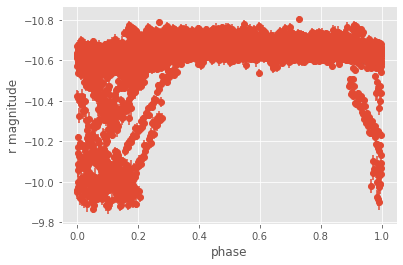

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
#mpl.rc('axes', prop_cycle=["#4C72B0", "#55A868", "#C44E52",
#                            "#8172B2", "#CCB974"])

# Fetch the RRLyrae data
from gatspy import datasets, periodic

# Fit the Lomb-Scargle model
model = periodic.LombScargleFast()
model.fit(t, mag, dmag)
model.optimizer.period_range = (0.2, 1.2)

# Predict on a regular phase grid
period = model.best_period
tfit = np.linspace(0, period, 1000)
magfit = model.predict(tfit)

# Plot the results
phase = (t / period) % 1
phasefit = (tfit / period)

fig, ax = plt.subplots()
ax.errorbar(phase, mag, dmag, fmt='o')
ax.plot(phasefit, magfit, '-', color='gray')
ax.set(xlabel='phase', ylabel='r magnitude')
ax.invert_yaxis()